# Final Project Background

To prepare for this project, I went through the datasets found in data.gov, and I was able to find a few related files uploaded from the State of Connecticut. These files are 'Connecticut_Prescriptions_per_Year.csv' and 'Prescription_Drug_Drop_Boxes.csv'. Besides being a graduate student, I'm a pharmacy technician, and when I was in retail, I remember patients would come up to the counter and ask if we could take back their unused medications at least once a week. Since our Walgreens store didn't have a drop off box and we didn't know if any nearby Walgreens had one, we would usually advise them to see if their local police station had one or to put the medications in a container with repellents like cat litter and dispose of it in the trash. However, these options may not be the best as someone could be wary of going to the police even if their medications were legally obtained and trash-diposed medications will not be properly destroyed. 

What I want to do with these datasets, and the other data I'll use in my project, is to determine how accessible these locations are to those living in Connecticut. Accessibility could be measured by how many people live close to a drop box location, the farthest distance between a populated area and a drop box, and if the location is law enforcement-based or retail-based. I think it is very important to have these drop boxes as accessible as possible because it promotes proper destruction of medications and hopefully limits how excess/unneeded medications are misused. For example, someone could be given a 7-day supply of clindamycin, take only 4 days worth, and keep the rest in their medicine cabinet. The next time they feel sick, they may feel inclined to finish off the clindamycin. However, since clindamycin is an antibiotic, using it when it is not the right treatment could lead to antibiotic resistance in that person and cause them to have unintended side effects that might make their sickness worse. Thus, if they utilized a drop box, they could ensure the medication would be properly disposed of and out of reach for future use.

# Datasets Used (in order of appearance)

- [Connecticut - Historical Population Data](https://www.macrotrends.net/states/connecticut/population) as XLSX copied from source

- [Connecticut Prescriptions per Year](https://catalog.data.gov/dataset/connecticut-prescriptions-per-year) as CSV downloaded from source

- [Prescription Drug Drop Boxes](https://catalog.data.gov/dataset/prescription-drug-drop-boxes) as CSV downloaded from source

- [Connecticut Zip Codes by Population](https://www.connecticut-demographics.com/zip_codes_by_population) as HTML retrieved from source

- Prescription Drug Drop Boxes ZIP (cleaned 'Prescription Drug Drop Boxes' dataset) as CSV downloaded from notebook





# Imports

In [102]:
import pandas as pd
import numpy as np 
from IPython.display import IFrame

# Connecticut Population

The first set of data we need to implement is the population of Connecticut by year. This dataset, called 'Connecticut - Historial Population Data', comes from macrotrends.net; since I somehow lost the ability to use pd.read_html to extract this data between first implementing it and later when I was finishing my project, I decided just to copy that information into an Excel file and go from there. <br><br> In the next section, we will see that dataset 'Connecticut Prescriptions per Year' includes data from 2014-2021. For this population dataset, we are only using the population for those years so that we may be able to see how the population has increased or decreased over time and to eventually find the average number of prescriptions per person; this information can help show the accessibility of prescription drop boxes.

In [103]:
pop_ct = pd.read_excel('Connecticut - Historical Population Data.xlsx', header=1)

# display historical population df
pop_ct

,Year,Population,Growth Rate
0,2021,3605597,0.0015
1,2020,3600260,0.0096
2,2019,3566022,-0.0024
3,2018,3574561,-0.0002
4,2017,3575324,-0.0013
...,...,...,...
117,1904,987000,0.0154
118,1903,972000,0.0210
119,1902,952000,0.0226
120,1901,931000,0.0231


In [104]:
pop_ct = pop_ct[0:8].drop(columns='Growth Rate') # select years 2014-2021 and remove unnecessary column

# display population df
pop_ct

,Year,Population
0,2021,3605597
1,2020,3600260
2,2019,3566022
3,2018,3574561
4,2017,3575324
5,2016,3579830
6,2015,3588561
7,2014,3595697


# Connecticut Prescriptions Per Year

Now, onto the 'Connecticut Prescriptions per Year' dataset. As we can see after reading the file into a dataframe and displaying it, this file includes yearly (2014 to 2021) counts of controlled and non-controlled prescriptions. However, you may notice that the majority of the non-controlled counts are zero except for 2021. Having this data would be extremely useful for this project, and it seems this data just wasn't collected. Since this data will be used for an educational purpose and will not be used for publication or any other serious use, I have decided to fill in that missing information (since it would be improbable to think that no one used non-controlled medication for 7 years)  using the control counts as a guide. Essentially, I will use the percent difference between the number of controls in 2021 and the number of controls for a specified year and apply that to the number of non-controls of that same year using the number of no-ncontrols in 2021; the formula I use is shown in the code below.

In [105]:
rx_ct = pd.read_csv('Connecticut_Prescriptions_per_Year.csv')

# display original
rx_ct 

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions,Opioid Prescriptions,Benzodiazepine Prescriptions
0,2014,6064563,0,2602050,1729192
1,2015,6249637,0,2625042,1667184
2,2016,6545550,0,2510702,1687910
3,2017,6724447,0,2161959,1617171
4,2018,6908152,0,1960988,1532053
5,2019,7330910,0,1946427,1458611
6,2020,8516519,0,1785575,1454611
7,2021,9188536,1908526,1731539,1396682


In [106]:
rx_ct = rx_ct.drop(columns=['Opioid Prescriptions', 'Benzodiazepine Prescriptions']) # opioids/benzos already included in controlled counts

# display before column update
rx_ct 

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions
0,2014,6064563,0
1,2015,6249637,0
2,2016,6545550,0
3,2017,6724447,0
4,2018,6908152,0
5,2019,7330910,0
6,2020,8516519,0
7,2021,9188536,1908526


In [107]:
# for-loop variables
controls = rx_ct['Controlled Substance Prescriptions']
noncontrols = rx_ct['Non-Controlled Substance Prescriptions']
controls_2021 = rx_ct['Controlled Substance Prescriptions'][7]
noncontrols_2021 = rx_ct['Non-Controlled Substance Prescriptions'][7]

# finds % difference, updates non control column
for row in range(len(rx_ct)-2, -1, -1):
    noncontrols[row] = ((1 - ((controls_2021 - controls[row]) / controls_2021)) * noncontrols_2021)
    
# updated prescription df
rx_ct

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions
0,2014,6064563,1259654
1,2015,6249637,1298095
2,2016,6545550,1359558
3,2017,6724447,1396716
4,2018,6908152,1434873
5,2019,7330910,1522683
6,2020,8516519,1768943
7,2021,9188536,1908526


Now that we have the prescription dataframe updated, we want to merge it with the population dataframe created earlier. By combining these dataframes, we will be able to easily determine the average number of prescriptions per person per year.

In [108]:
# combine prescription and population dfs as new prescription df
rx_ct = rx_ct.merge(pop_ct, how='left')

# merged prescription df
rx_ct

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions,Population
0,2014,6064563,1259654,3595697
1,2015,6249637,1298095,3588561
2,2016,6545550,1359558,3579830
3,2017,6724447,1396716,3575324
4,2018,6908152,1434873,3574561
5,2019,7330910,1522683,3566022
6,2020,8516519,1768943,3600260
7,2021,9188536,1908526,3605597


In [109]:
# total prescriptions / total population for each year
rx_ct['Prescriptions per Person'] = (controls + noncontrols) / rx_ct['Population']

# finalized prescription df
rx_ct

,Year,Controlled Substance Prescriptions,Non-Controlled Substance Prescriptions,Population,Prescriptions per Person
0,2014,6064563,1259654,3595697,2.036939
1,2015,6249637,1298095,3588561,2.103275
2,2016,6545550,1359558,3579830,2.208236
3,2017,6724447,1396716,3575324,2.271448
4,2018,6908152,1434873,3574561,2.334000
5,2019,7330910,1522683,3566022,2.482765
6,2020,8516519,1768943,3600260,2.856866
7,2021,9188536,1908526,3605597,3.077732


#### Graph 1. Number of Controlled and Non-Controlled Prescriptions per Year (2014-2021)
This bar graph shows the yearly counts for controlled and non-controlled prescriptions per year. We can see that both types of prescriptions increase each year (which is a given since the non-control counts are based on the control counts) starting at around 7 million in total to over 10 million. The more the total number of prescriptions increase, the more people will need to rely on prescription drop boxes to dispose of their medications.

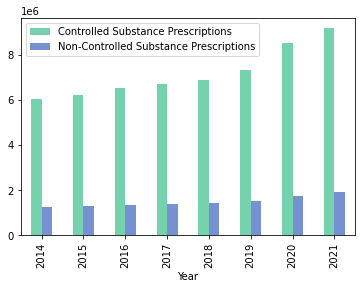

In [110]:
rx_ct.plot(x='Year', y=['Controlled Substance Prescriptions','Non-Controlled Substance Prescriptions'], 
           kind='bar', color=['#75D2AC','#7591D2'])

#### Graph 2. Number of Average Prescriptions per Person per Year (2014-2021)
This line graph shows how the average number of prescriptions per person increase over a 8-year period. This number during 2014 increased ~50% by 2021, from ~2 prescriptions per person to over 3 prescriptions per person, showing another reason why accessibility to prescription drop boxes is important.

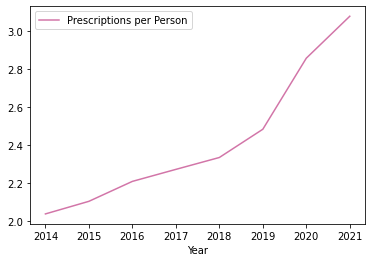

In [111]:
rx_ct.plot(x='Year', y='Prescriptions per Person', color='#D275A8')

# Connecticut Prescription Drug Drop Boxes

Next, we have the 'Prescriptions Drug Drop Boxes' dataset. This dataset includes information like facility name, address/location, id number, and whether or not the facility is connected to law enforcement. I will use this dataset to show the locations and classification of these drop boxes can impact its accessibility to CT residents. We can see in the dataframe below that many of the columns' values differ between being totally uppercase or having mixed-cased values, the ZIP code is shown as either XXXXX-XXXX or XXXXX, and there are a few missing/ill-formated values as well. I will use two self-created functions (toupper() and replace()) to clean the dataset and make it more usable. 

In [112]:
drop_box_ct = pd.read_csv('Prescription_Drug_Drop_Boxes.csv')

# display before cleaning
drop_box_ct 

,FACILITY,ADDRESS,CITY,STATE,ZIP,CREDENTIALID,LAWENFORCEMENT,New Georeferenced Column
0,NEW BRITAIN POLICE DEPARTMENT,10 CHESTNUT ST,NEW BRITAIN,CT,06051-2654,1349023,True,POINT (-72.78093 41.6658)
1,WATERBURY POLICE DEPARTMENT,255 E MAIN ST,WATERBURY,CT,06702-2301,1143916,True,POINT (-73.03629 41.55461)
2,ANSONIA POLICE DEPARTMENT,65 Main Street,ANSONIA,CT,06401-3310,1075890,True,POINT (-73.07959 41.345408)
3,SOUTH WINDSOR POLICE DEPARTMENT,151 SAND HILL RD,SOUTH WINDSOR,CT,06074-2026,1157538,True,POINT (-72.55222 41.83585)
4,BRISTOL POLICE DEPARTMENT,131 N MAIN ST,BRISTOL,CT,06010-8123,1424496,True,POINT (-72.946121 41.674226)
...,...,...,...,...,...,...,...,...
108,Middlebury Police Dept.,200 Southford Road,Middlebury,CT,06762,2206784,True,POINT (-73.137679 41.518361)
109,St. Vincent's Outpatient Pharmacy,2800 Main Street,Bridgeport,CT,06606,2002416,False,POINT (-73.202955 41.200782)
110,WOLCOTT POLICE DEPT.,225 NICHOLS RD,WOLCOTT,CT,06716-2718,1055726,True,POINT (-72.98357 41.57877)
111,RIDGEFIELD POLICE DEPT.,76 EAST RIDGE RD,RIDGEFIELD,CT,06877-5022,1035832,True,POINT (-73.49381 41.28053)


In [113]:
def to_upper(df, columns):
    """ (dataframe, str or list of str)
    This function will take in a dataframe and the column(s) selected to capitalize every value in the column. 
    """
    
    for column in columns:
        df[column] = df[column].str.upper()

In [114]:
def replace_values(df, column, row, value):
    """ (dataframe, str, int, str)
    This function will take in a dataframe and the column, row, and value selected to replace the current value at a column and row 
    intersection with a new value. 
    """
    df[column][row] = value

In [115]:
# data cleaning
to_upper(drop_box_ct, ['CITY', 'ADDRESS', 'FACILITY'])

drop_box_ct['ZIP'] = pd.to_numeric(drop_box_ct['ZIP'].str[:5]) # uses XXXX format since leading 0 is disregarded

replace_values(drop_box_ct, 'CITY', 54, 'EAST HARTFORD')
replace_values(drop_box_ct, 'ADDRESS', 97, 'P.O. BOX 306')

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
# cleaned drop box df
drop_box_ct

,FACILITY,ADDRESS,CITY,STATE,ZIP,CREDENTIALID,LAWENFORCEMENT,New Georeferenced Column
0,NEW BRITAIN POLICE DEPARTMENT,10 CHESTNUT ST,NEW BRITAIN,CT,6051,1349023,True,POINT (-72.78093 41.6658)
1,WATERBURY POLICE DEPARTMENT,255 E MAIN ST,WATERBURY,CT,6702,1143916,True,POINT (-73.03629 41.55461)
2,ANSONIA POLICE DEPARTMENT,65 MAIN STREET,ANSONIA,CT,6401,1075890,True,POINT (-73.07959 41.345408)
3,SOUTH WINDSOR POLICE DEPARTMENT,151 SAND HILL RD,SOUTH WINDSOR,CT,6074,1157538,True,POINT (-72.55222 41.83585)
4,BRISTOL POLICE DEPARTMENT,131 N MAIN ST,BRISTOL,CT,6010,1424496,True,POINT (-72.946121 41.674226)
...,...,...,...,...,...,...,...,...
108,MIDDLEBURY POLICE DEPT.,200 SOUTHFORD ROAD,MIDDLEBURY,CT,6762,2206784,True,POINT (-73.137679 41.518361)
109,ST. VINCENT'S OUTPATIENT PHARMACY,2800 MAIN STREET,BRIDGEPORT,CT,6606,2002416,False,POINT (-73.202955 41.200782)
110,WOLCOTT POLICE DEPT.,225 NICHOLS RD,WOLCOTT,CT,6716,1055726,True,POINT (-72.98357 41.57877)
111,RIDGEFIELD POLICE DEPT.,76 EAST RIDGE RD,RIDGEFIELD,CT,6877,1035832,True,POINT (-73.49381 41.28053)


ZIP codes can be used to show where in a general area a drop box is located. Below, I will use a function to assign a label to each ZIP code that will then be used to group ZIP codes by the 100s.

In [117]:
def zip_codes(zip_code):
    """ (int) -> int
    This functions will take in a integer value and assign it a ZIP code group label by the 100s between 6000 and 6900 if the integer falls
    in the range of a specific label. The label is then returned as an integer.
    """
    
    levels = [
        {'min': 6000, 'max': 6099,  'label': 6000},
        {'min': 6100, 'max': 6199,  'label': 6100},
        {'min': 6200, 'max': 6299,  'label': 6200},
        {'min': 6300, 'max': 6399,  'label': 6300},
        {'min': 6400, 'max': 6499,  'label': 6400},
        {'min': 6500, 'max': 6599,  'label': 6500},
        {'min': 6600, 'max': 6699,  'label': 6600},
        {'min': 6700, 'max': 6799,  'label': 6700},
        {'min': 6800, 'max': 6899,  'label': 6800},
        {'min': 6900, 'max': 6999,  'label': 6900}
    ]
        
    for level in levels:
        if zip_code >= level.get('min') and zip_code <= level.get('max'):
            return level.get('label')

In [118]:
drop_box_ct['ZIP GROUP'] = drop_box_ct['ZIP'].map(zip_codes)
drop_box_ct.to_csv('Prescription_Drug_Drop_Boxes_ZIP.csv') # export for use at the end of document

In [119]:
zip_groups = drop_box_ct.groupby('ZIP GROUP')
zip_groups = zip_groups.count().reset_index().rename(columns={'ZIP GROUP':'ZIP by the 100s'})

# display new grouped df
zip_groups

,ZIP by the 100s,FACILITY,ADDRESS,CITY,STATE,ZIP,CREDENTIALID,LAWENFORCEMENT,New Georeferenced Column
0,6000,23,23,23,23,23,23,23,23
1,6100,5,5,5,5,5,5,5,5
2,6200,6,6,6,6,6,6,6,6
3,6300,16,16,16,16,16,16,16,16
4,6400,28,28,28,28,28,28,28,28
5,6500,6,6,6,6,6,6,6,6
6,6600,6,6,6,6,6,6,6,6
7,6700,10,10,10,10,10,10,10,10
8,6800,13,13,13,13,13,13,13,13


#### Graph 3. Number of Drop Boxes per ZIP Code Group
According to this bar graph, ZIPs 6400, 6000, and 6300 have the highest number of drop box locations (15-25+) whereas ZIPs 6100, 6200, 6500, and 6600 are nearly tied for the least amount (~5). ZIP codes in the 6900 group don't even have any kind of drop box locations even though residents live there. We might assume that residents of those five ZIP codes have less access to these drop boxes than residents of the other ZIP codes, but we will see later how this compares to the number of people per ZIP code.

Text(0, 0.5, 'Number of Drop Boxes')

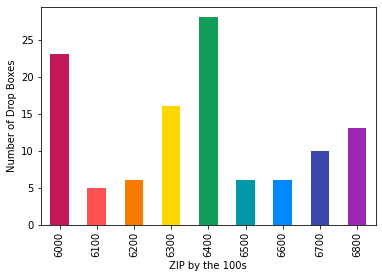

In [120]:
zip_groups.plot.bar(x='ZIP by the 100s', y='CREDENTIALID', color=['#C2185B','#FF5252','#F57C00','#FFD600','#0F9D58','#0097A7',
                    '#0288FF', '#3949AB', '#9C27B0'], legend=False).set_ylabel('Number of Drop Boxes')

Here, we will look at the classification of these drop boxes. The LAWENFORCEMENT column shows whether a drop box is located in a police-related facility (True) or not (False). We will use this column along with the newly created ZIP GROUP column from the drop_box_ct dataframe to create a pivot table to get a clearer picture of this classification.

In [121]:
law_by_zip = drop_box_ct.pivot_table(
    values='CREDENTIALID',  
    columns='LAWENFORCEMENT',
    index='ZIP GROUP',
    aggfunc=np.ma.count, 
    fill_value=0)

# display pivot table
law_by_zip

LAWENFORCEMENT,False,True
ZIP GROUP,,
6000,2,21
6100,1,4
6200,1,5
6300,3,13
6400,5,23
6500,1,5
6600,3,3
6700,1,9
6800,0,13


In [122]:
law_by_zip.sum()

LAWENFORCEMENT
False    17
True     96
dtype: int64

#### Graph 4. Number of Drop Boxes per ZIP Code Group by Law Enforcement Status
We can see that the majority of the drop boxes in Connecticut are police-related, and all ZIP codes have 5 or less (sometimes 0) pharmacy-based locations. As I explained in the background, people might be hesistant to drop off their unused medications at law-enforcement-based locations, which account for 96 out of the 113 locations. 

Text(0, 0.5, 'Number of Drop Boxes')

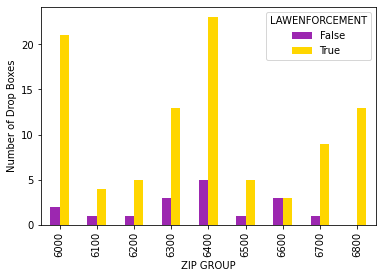

In [123]:
law_by_zip.plot(kind='bar', color=['#9C27B0', '#FFD600']).set_ylabel('Number of Drop Boxes')

# Connecticut Zip Codes by Population
Next, we want to take a look at the population for each specific ZIP code group. We will be using a dataset from connecticut-demographics.com to merge with the zip groups dataframe to align each 2020 population to its specified grouping. Then, we will be able to see the number of people per ZIP code and compare that to the number of drop boxes for the same area.

In [124]:
demographics = pd.read_html('https://www.connecticut-demographics.com/zip_codes_by_population')

pop_per_zip = demographics[0]

# display original demographics dataset
pop_per_zip

,Rank,Zip Code,Population
0,1,06902,70199
1,2,06010,60039
2,3,06516,54666
3,4,06511,53859
4,5,06810,52578
...,...,...,...
272,273,06022,102
273,274,06091,101
274,275,06350,62
275,276,06856,5


In [125]:
pop_per_zip = pop_per_zip.drop(276) # drop last row
pop_per_zip = pop_per_zip.drop(columns='Rank') # drop unnecessary column

# display updated demographics df
pop_per_zip

,Zip Code,Population
0,06902,70199
1,06010,60039
2,06516,54666
3,06511,53859
4,06810,52578
...,...,...
271,06264,137
272,06022,102
273,06091,101
274,06350,62


In [126]:
# split up rows with population ties
replace_values(pop_per_zip, 'Zip Code', 178, '06237')
pop_per_zip = pop_per_zip.append({'Zip Code': '06791', 'Population': 5428}, ignore_index = True)

replace_values(pop_per_zip, 'Zip Code', 220, '06380')
pop_per_zip = pop_per_zip.append({'Zip Code': '06334', 'Population': 2509}, ignore_index = True)

pop_per_zip['Zip Code'] = pd.to_numeric(pop_per_zip['Zip Code']) # make ZIP codes use numeric XXXX format

# display updated demographics df
pop_per_zip

,Zip Code,Population
0,6902,70199
1,6010,60039
2,6516,54666
3,6511,53859
4,6810,52578
...,...,...
273,6091,101
274,6350,62
275,6856,5
276,6791,5428


In [127]:
pop_per_zip['ZIP by the 100s'] = pop_per_zip['Zip Code'].map(zip_codes) # label ZIP groups

pop_per_zip['Population'] = pd.to_numeric(pop_per_zip['Population'])

In [128]:
# display completed demographics df
pop_per_zip

,Zip Code,Population,ZIP by the 100s
0,6902,70199,6900
1,6010,60039,6000
2,6516,54666,6500
3,6511,53859,6500
4,6810,52578,6800
...,...,...,...
273,6091,101,6000
274,6350,62,6300
275,6856,5,6800
276,6791,5428,6700


In [129]:
zip_groups_pop = zip_groups.merge(pop_per_zip, how='left')

# display merged population/zip df
zip_groups_pop

,ZIP by the 100s,FACILITY,ADDRESS,CITY,STATE,ZIP,CREDENTIALID,LAWENFORCEMENT,New Georeferenced Column,Zip Code,Population
0,6000,23,23,23,23,23,23,23,23,6010,60039
1,6000,23,23,23,23,23,23,23,23,6082,43952
2,6000,23,23,23,23,23,23,23,23,6040,35553
3,6000,23,23,23,23,23,23,23,23,6053,34142
4,6000,23,23,23,23,23,23,23,23,6051,30618
...,...,...,...,...,...,...,...,...,...,...,...
267,6800,13,13,13,13,13,13,13,13,6870,7831
268,6800,13,13,13,13,13,13,13,13,6807,7176
269,6800,13,13,13,13,13,13,13,13,6890,4540
270,6800,13,13,13,13,13,13,13,13,6853,3969


In [130]:
zip_groups_pop['Population'].sum() # population total

3440796

In [131]:
pop_ct['Population'][0] - zip_groups_pop['Population'].sum() # 2021 CT population - 2020 ZIP code population

164801

Because one of the datasets used to create the zip_group_pop df had 2020 data (not 2021) and there were no drop boxes in the 6900 ZIP code group to merge with those populations, we see that 164,801 residents are left out of this project.

In [132]:
# combine each ZIP code group and sum their total population
zip_groups_pop = zip_groups_pop.groupby('ZIP by the 100s')['CREDENTIALID','Population'].agg({'CREDENTIALID':'first', 'Population':'sum'})

# display updated population/zip df
zip_groups_pop

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,CREDENTIALID,Population
ZIP by the 100s,,
6000,23,673342
6100,5,291947
6200,6,164038
6300,16,261652
6400,28,715586
6500,6,288318
6600,6,240314
6700,10,323472
6800,13,482127


In [133]:
# total population / total drop boxes
zip_groups_pop['People per Drop Box'] = round(zip_groups_pop['Population'] / zip_groups_pop['CREDENTIALID'], 0) # can't have fractions of people

In [134]:
# finalized population/zip df
zip_groups_pop

,CREDENTIALID,Population,People per Drop Box
ZIP by the 100s,,,
6000,23,673342,29276.0
6100,5,291947,58389.0
6200,6,164038,27340.0
6300,16,261652,16353.0
6400,28,715586,25557.0
6500,6,288318,48053.0
6600,6,240314,40052.0
6700,10,323472,32347.0
6800,13,482127,37087.0


#### Graph 5. Number of People per Drop Box per ZIP Code Group
We can see that drop boxes with locations in ZIP code group 6100 has 60,000 people they might service (the most of any ZIP code group), and locations in ZIP code group 6300 have the least amount of people (<20,000). 8 out the 9 ZIP code groups shown have at least 30,000 people per drop box. To improve accessibility in these ZIP codes, we would need the the number of people per drop box to be more like 6300. The way to do that is to open more locations.

Text(0, 0.5, 'Number of People per Drop Box')

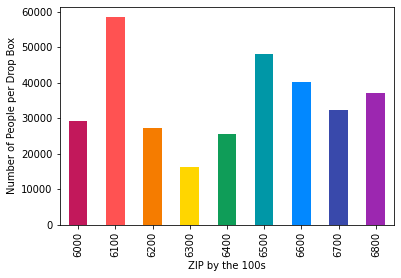

In [135]:
zip_groups_pop.plot(y='People per Drop Box', kind='bar', color=['#C2185B','#FF5252','#F57C00','#FFD600','#0F9D58','#0097A7',
            '#0288FF', '#3949AB', '#9C27B0'], legend=False).set_ylabel('Number of People per Drop Box')

# Exported 'Prescription Drug Drop Boxes ZIP' File as a Map
When I was originally planning this project, I wanted to be able to show on a map where these drop box locations are. I was thinking of the using the coordinate information from the Prescription Drug Drop Boxes but I soon realized what a undertaking that would be; however, I found out that I could create my own Google Map using the csv file and use IFrame to display it in a interactive way. 

In [136]:
IFrame("https://www.google.com/maps/d/embed?mid=1mR4gdKC1qyR3FKLnB2zPd7S2rLB0Glo&ehbc=2E312F", width=640, height=480)

#### Map 1. Prescription Drop Boxes in CT Highlighted by ZIP Code Groupings
By using the same coloring as Graphs 3 & 5, we can clearly see how the drop box locations are classified by ZIP code grouping. You can see that there are some clear gaps in accessibility, especially in the upper left corner, the space in between ZIP code group 6200, and the space between ZIP code group 6400. Surprisingly, 6200 and 6400 are groups with some of the lowest people per drop box rates. If it were up to me, I would put more drop boxes in bigger cities like Hartford and New Haven and along Western Connecticut to improve accessibility based on location.

In [137]:
IFrame("https://www.google.com/maps/d/embed?mid=1zqlq4IUkJvTJ-Xh3rieEAbGhCJE8TpU&ehbc=2E312F", width=640, height=480)

#### Map 2. Prescription Drop Boxes in CT Highlighted by Law Enforcement Status
Likewise with Map 1, I used the same coloring from Graph 4. Here we can see how there are very few non-law enforcement-based drop box locations and they are seem to be settled around bigger cities. If a resident from Salisbury in the upper left corner of the state wanted to dispose of their medications properly in a drop box but they didn't want to go to the police, they would have to travel to Bristol for the nearest pharmacy-based location. This journey is over an hour long and might encourage people who live far away to simply toss their unused medications in the trash or keep them in their houses. Again, if I were in charge of drop box locations, I would add more pharmacy-based locations throughout the state so that any location in CT was at most 20-30 minutes away from one.